In [24]:
import pandas as pd
import warnings
import re
import folium
from selenium import webdriver
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_parquet("FINAL_FLORIDA.parquet")


Aqui cargo el archivo FINAL_FLORIDA.parquet para empezar el eda:

In [26]:
df.shape

(563227, 16)

In [27]:
df.head(1)

,business_name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,user_name,time,rating,text
1,Honduras Nica Cafe,"Honduras Nica Cafe, 280 NW 79th St, Miami, FL ...",None,25.847143,-80.20237,['Honduran restaurant'],3.5,84,None,"[[Thursday, 7AM–9PM], [Friday, 7AM–10PM], [Sat...",{'Accessibility': ['Wheelchair accessible entr...,Closes soon ⋅ 9PM ⋅ Opens 7AM Fri,Cindys 4luvz,17/04/2021,4.0,The nacatamal is a good size and taste ok. The...


In [28]:

unique_addresses = df.drop_duplicates(subset='address', keep='first')

In [29]:
# Creo un mapa centrado alrededor de Florida
florida_map = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)

# Agrego cada punto del dataframe al mapa
for _, row in unique_addresses.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(florida_map)

#tardo 5 minutos 24 segundos
florida_map.save("mapa_restaurants_totales_en_florida_con_review.html")


Aqui tenemos ploteado el mapa con todos los restaurants en el mapa de florida

In [30]:
nan_count = df['address'].isna().sum()
print(f"Number of NaN values in 'address' column: {nan_count}")


Number of NaN values in 'address' column: 228


Por lo visto hay 228 filas sin address pero eso no importa porque tienen longitud y latitud y las podemos ubicar en el mapa de todas formas


In [31]:
df.head(1)

,business_name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,user_name,time,rating,text
1,Honduras Nica Cafe,"Honduras Nica Cafe, 280 NW 79th St, Miami, FL ...",None,25.847143,-80.20237,['Honduran restaurant'],3.5,84,None,"[[Thursday, 7AM–9PM], [Friday, 7AM–10PM], [Sat...",{'Accessibility': ['Wheelchair accessible entr...,Closes soon ⋅ 9PM ⋅ Opens 7AM Fri,Cindys 4luvz,17/04/2021,4.0,The nacatamal is a good size and taste ok. The...


In [32]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Contar las repeticiones de cada par de coordenadas
df['coord_count'] = df.groupby(['latitude', 'longitude']).transform('size')

# Crear un mapa centrado en Florida
m = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)  # Estas coordenadas centran el mapa en Florida

# Preparar los datos para el heatmap
# Las filas con mayor conteo tendrán mayor peso en el heatmap
heat_data = [[row['latitude'], row['longitude'], row['coord_count']] for index, row in df.iterrows()]

# Agregar el heatmap al mapa
HeatMap(heat_data,radius=5,blur=3).add_to(m)

m.save("mapa_de_calor_densidad_de_total_de:_restaurants_florida.html")


Aqui ploteamos un mapa de calor, por densidad de restaurants aglomerados por area de mayor densidad en el estado de Florida

In [33]:
import numpy as np
import folium
from folium.plugins import HeatMap

# Contar las repeticiones de cada combinación de latitud y longitud
df['latlong_count'] = df.groupby(['latitude', 'longitude']).transform('count').iloc[:, 0]

# Transformar usando escala logarítmica. Agregamos 1 para evitar log(0).
df['log_count'] = np.log(df['latlong_count'] + 1)

# Crear un mapa centrado en Florida
m = folium.Map(location=[27.9944024, -81.7602544], zoom_start=7)

# Preparar los datos para el heatmap
heat_data = [[row['latitude'], row['longitude'], row['log_count']] for index, row in df.iterrows()]

# Definir el gradiente de color
gradient = {
    0.0: '#0000ff',
    0.5: '#00ff00',
    1.0: '#ff0000'
}

# Agregar el heatmap al mapa
HeatMap(heat_data, gradient=gradient, radius=5,blur=5).add_to(m)

m.save("mapa_restaurants_densidad_total_restaurants_mas_en_detalle.html")


Aqui se ploteo un mapa de calor pero mas en detalle la densidad de restaurants por area

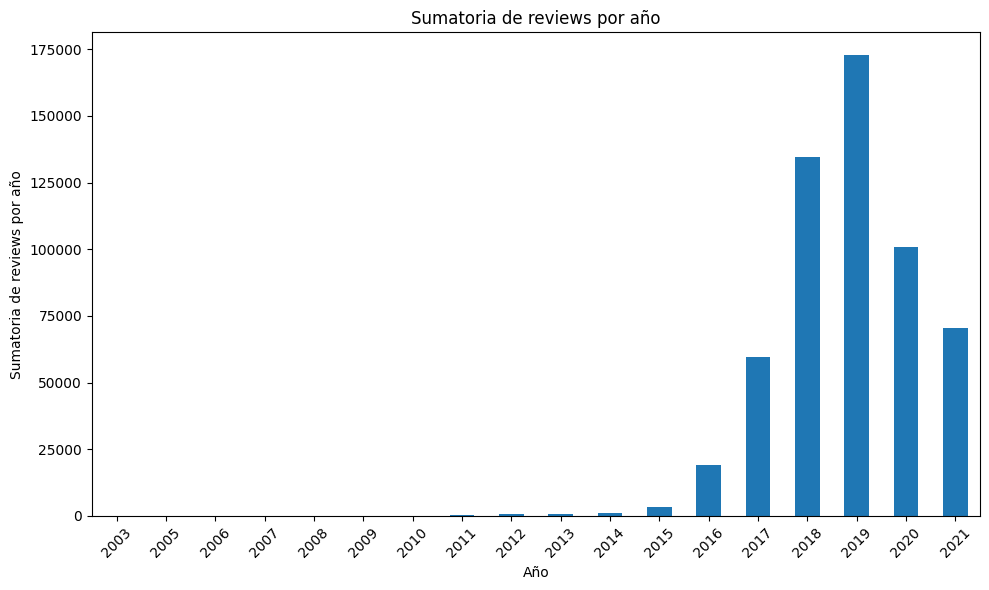

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer el año de la columna 'time'
df['year'] = pd.to_datetime(df['time'], format='%d/%m/%Y').dt.year

# Agrupar por latitud, longitud y año, y contar duplicados
grouped = df.groupby(['latitude', 'longitude', 'year']).size().reset_index(name='duplicates_count')

# Sumar los duplicados por año
sum_duplicados_by_year = grouped.groupby('year')['duplicates_count'].sum()

# Graficar
sum_duplicados_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Sumatoria de reviews por año')
plt.xlabel('Año')
plt.ylabel('Sumatoria de reviews por año')
plt.xticks(rotation=45)
plt.tight_layout()

# Guardar la figura en PNG
plt.savefig("sumatoria_de_reviews_por_anio_restaurants.png", dpi=300)


Aqui tenemos un gráfico de barras mostrando reviews por año de todos los restaurants para ver cuanta info tenemos por año para luego analizar el sentimiento en los años donde mas tenemos datos para analizar, en este caso nos quedmos con la serie 2018 a 2021 que es el ultimo año donde tenemos data para analizar

In [35]:
df.shape

(563227, 20)

In [36]:
import pandas as pd

# Convertir la columna 'time' a formato de fecha
df['time'] = pd.to_datetime(df['time'], format='%d/%m/%Y')

# Extraer el año de la columna 'time'
df['year'] = df['time'].dt.year

# Filtrar el DataFrame por las filas en el rango de años 2018-2021
filtered_df = df[df['year'].between(2018, 2021)]

filtered_df.shape

(478475, 20)

In [37]:
filtered_df.head(1)

,business_name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,user_name,time,rating,text,coord_count,latlong_count,log_count,year
1,Honduras Nica Cafe,"Honduras Nica Cafe, 280 NW 79th St, Miami, FL ...",None,25.847143,-80.20237,['Honduran restaurant'],3.5,84,None,"[[Thursday, 7AM–9PM], [Friday, 7AM–10PM], [Sat...",{'Accessibility': ['Wheelchair accessible entr...,Closes soon ⋅ 9PM ⋅ Opens 7AM Fri,Cindys 4luvz,2021-04-17,4.0,The nacatamal is a good size and taste ok. The...,30,30,3.433987,2021


In [38]:
from textblob import TextBlob

# Función para determinar el nivel de sentimiento de una serie de textos
def sentiment_level(text_series):
    polarities = []

    for text in text_series:
        analysis = TextBlob(text)
        polarities.append(analysis.sentiment.polarity)

    # Calcula la polaridad promedio de los textos
    avg_polarity = sum(polarities) / len(polarities)

    # Clasificar el nivel de sentimiento basado en la polaridad promedio
    if avg_polarity <= -0.2:
        return 1  # Negativo
    elif -0.2 < avg_polarity <= -0.1:
        return 2  # No tan negativo
    elif -0.1 < avg_polarity < 0.1:
        return 3  # Neutral
    elif 0.1 <= avg_polarity < 0.4:
        return 4  # Positivo
    else:
        return 5  # Muy positivo

# Agrupar por año, latitud y longitud y calcular el nivel de sentimiento para cada grupo
sentiment_levels_by_group = df.groupby(['year', 'latitude', 'longitude'])['text'].apply(sentiment_level).reset_index()

# Reformatar y renombrar las columnas para facilitar la interpretación
sentiment_levels_by_group.columns = ['year', 'latitude', 'longitude', 'Sentiment Level']

# Fusiona df con sentiment_levels_by_group para agregar la columna 'Sentiment Level'
df = pd.merge(df, sentiment_levels_by_group, on=['year', 'latitude', 'longitude'], how='left')




Aqui arriba analizamos el sentimiento creando una funcion que recibe una serie de textos a analizar y retorna 5 niveles de positividad, definido en 5 valores los cuales van del 1 al 5 siendo 5 el mas positivo, y 1 el mas negativo <br>
-Negativo<br>
-No tan negativo<br>
-Neutral<br>
-Positivo<br>
-Muy positivo<br>

In [39]:
# Usar value_counts() para obtener una serie de valores y sus conteos.
value_counts = df['Sentiment Level'].value_counts()

# Valor máximo
max_val = df['Sentiment Level'].max()

# Valor mínimo
min_val = df['Sentiment Level'].min()

# Primera moda (valor más repetido)
first_mode_val = value_counts.index[0]

# Segunda moda (segundo valor más repetido)
second_mode_val = value_counts.index[1] if len(value_counts) > 1 else None

# Tercera moda (tercer valor más repetido)
third_mode_val = value_counts.index[2] if len(value_counts) > 2 else None

# Promedio
average_val = df['Sentiment Level'].mean()

print(f"Máximo: {max_val}")
print(f"Mínimo: {min_val}")
print(f"1er Moda (valor más repetido): {first_mode_val}")
print(f"2do Moda (segundo valor más repetido): {second_mode_val}")
print(f"3er Moda (tercer valor más repetido): {third_mode_val}")
print(f"Promedio: {average_val}")



Máximo: 5
Mínimo: 1
1er Moda (valor más repetido): 5
2do Moda (segundo valor más repetido): 4
3er Moda (tercer valor más repetido): 3
Promedio: 4.64238042565431


Aqui analizo los valores de sentimiento mas frecuentes en el dataframe, el promedio , maximo y minimo, para escalar mejor el sentimiento

In [40]:

import folium
import numpy as np
import pandas as pd

# Función para determinar el color basado en el nivel de sentimiento
def sentiment_color(sentiment_level):
    colors = {
        1: '#FF0000',   # rojo
        2: '#FFA500',   # naranja
        3: '#FFFF00',   # amarillo
        4: '#7CFC00',   # verde claro
        5: '#006400'    # verde oscuro
    }
    return colors.get(sentiment_level, '#FFFFFF')  # blanco por defecto para cualquier otro caso

# Función para la tendencia de sentimientos
def sentiment_trend(sentiments):
    if len(sentiments) == 1:
        return sentiments.iloc[0]
    # Si hay más de un año, calcular la tendencia
    average_sentiment = round(np.mean(sentiments))
    return average_sentiment

# Obtiene el nivel de tendencia del sentimiento
df['Trend Level'] = df.groupby(['latitude', 'longitude'])['Sentiment Level'].transform(sentiment_trend)

# Obtiene el color basado en el nivel de tendencia
df['color'] = df['Trend Level'].apply(sentiment_color)



Aqui definimos un color basado en el valor de sentimiento, si tenemos solo un año no hay nada que comparar quedara ese analisis solamente, pero si tenemos 4 años de diferentes analisis de sentimiento anual, lo que hice es un promedio de sentimiento en los 4 años. Los numeros que definimos antes de positividad del 1 al 5 y le asignamos un color a cada numero, para luego graficar en el mapa el sentimiento con ese color

In [41]:

# Contar cuántos registros hay para cada combinación de latitud y longitud.
counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='counts')

# Normalizar estos conteos para obtener una opacidad entre 0.5 y 1.
max_count = counts['counts'].max()
counts['opacity'] = 0.5 + 0.5 * (counts['counts'] / max_count)  # Ajusta según tus preferencias

# Unir estos valores de opacidad al DataFrame original.
df = df.merge(counts[['latitude', 'longitude', 'opacity']], on=['latitude', 'longitude'], how='left')

# Ordenar los datos en función del color
color_order = {'#006400': 5, '#7CFC00': 4, '#FFFF00': 3, '#FFA500': 2, '#FF0000': 1}
df['color_rank'] = df['color'].map(color_order)
df_sorted = df.sort_values(by='color_rank', ascending=False)

# Luego de esto, elimino de duplicados .
unique_locs = df_sorted.drop_duplicates(subset=['latitude', 'longitude', 'color', 'opacity'])


Aqui arriba definimos la opacidad de los colores por cantidad de reviews repetidas en la misma latitud y longitud dando mas opacidad a si tiene mas reviews por lo tanto dando un analisis de sentimiento mas certero a mayor cantidad de reviews, luego ordenamos los colores para que se ploteen primero los resultados de mayor positividad, y por ultimo los de mayor negatividad, para que no queden superpuestos en el mapa ya que son puntos mas especificos, teniendeo en cuenta que la mayoria de las puntuaciones son buenas, nos queda un dataframe con latitud, longitud, color(por sentimiento) y opacidad(por cantidad de reviews)

In [42]:

# Crear mapa centrado en Florida
m = folium.Map(location=[27.9944024, -81.7602544] ,zoom_start=6)

for idx, row in unique_locs.iterrows():
    if pd.notna(row['color']):  # Solo dibujar si tenemos un color válido
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            color=row['color'],
            fill=True,
            fill_color=row['color'],
            fill_opacity=row['opacity'],
            weight=0,
            radius=2,
            blur=100
        ).add_to(m)

m.save("mapa_de_evolucion_de_sentimiento_muy_detallado_4_a_anios.html")



In [43]:
green_dark_coords = df[df['color'] == '#006400'][['latitude', 'longitude']].values.tolist()
yellow_coords = df[df['color'] == '#FFFF00'][['latitude', 'longitude']].values.tolist()
red_coords = df[df['color'] == '#FF0000'][['latitude', 'longitude']].values.tolist()

-aqui ahora ploteamos un mapa con los sentimientos antes definidos a traves de los años, pero ahora solo con 3 colores verde oscuro para positivos, amarillo para neutral, y rojo para negativos, para que sea mas facil la lectura de la informacion en el mapa y mas simplificada

In [44]:
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[27.9944024, -81.7602544], zoom_start=6)

# Añade capa de calor para verde oscuro
HeatMap(green_dark_coords, name='Verde Oscuro', gradient={0: '#FFFFFF', 1: '#006400'}, radius=10, blur=5).add_to(m)

# Añade capa de calor para amarillo
HeatMap(yellow_coords, name='Amarillo', gradient={0: '#FFFFFF', 1: '#FFFF00'}, radius=6, blur=3).add_to(m)

# Añade capa de calor para rojo
HeatMap(red_coords, name='Rojo', gradient={0: '#FFFFFF', 1: '#FF0000'}, radius=10, blur=5).add_to(m)

# Opción para encender/apagar capas
folium.LayerControl().add_to(m)

m.save("mapa_de_densidad_de sentimiento_menos detallado_a_4_anios.html")

